In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
###Prepare Data

In [ ]:
num_classes=10
input_shape =(28,28,1)
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


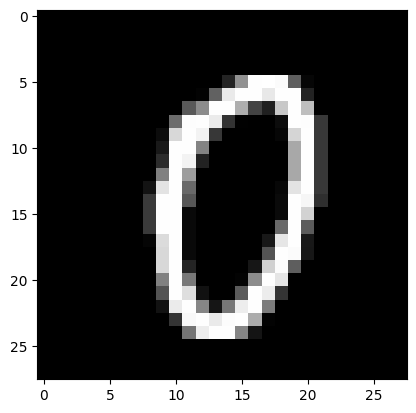

In [ ]:
test=x_train[1000]
plt.imshow(test, cmap ='gray')
plt.show()

In [ ]:
#Pre Process

In [ ]:
x_train =x_train.astype("float32")/225
x_test =x_test.astype("float32")/225
#make sure input shape =28 28 1
x_train= np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " -Train samples")
print(x_test.shape[0], "-Test samples")

x_train shape:  (60000, 28, 28, 1)
60000  -Train samples
10000 -Test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Build Model

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
#Train Model

In [ ]:
batch_size =128
epochs =15

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 69s 161ms/step - loss: 0.3573 - accuracy: 0.8919 - val_loss: 0.0797 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 51s 121ms/step - loss: 0.1105 - accuracy: 0.9660 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 50s 119ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.0479 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 49s 117ms/step - loss: 0.0710 - accuracy: 0.9776 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0393 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 49s 117ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 49s 117ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0373 - val_ac

In [ ]:
#Evaluate the trained model

score=model.evaluate(x_test, y_test, verbose =0)
print("Test loss: ", score[0])
print("Test accuracy: " , score[1])

Test loss:  0.02577449567615986
Test accuracy:  0.9905999898910522


In [ ]:
import cv2